<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/covid_municipal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates


In [70]:
#!git clone "https://github.com/mauforonda/covid19bolivia-municipal"

In [71]:
#!git --help

In [72]:
departamentos = ["la_paz","cochabamba","santa_cruz","oruro","potosi","tarija","chuquisaca","beni","pando"]

for i in range(9):
  departamentos[i] = pd.read_csv("https://raw.githubusercontent.com/mauforonda/covid19bolivia-municipal/master/{}.csv".format(departamentos[i]))

df = pd.concat(departamentos[0:9])
df

,fecha,cod_ine,municipio,confirmados
0,2020-03-19,20101,Nuestra Señora de La Paz,1
1,2020-03-24,20101,Nuestra Señora de La Paz,1
2,2020-03-24,21701,Copacabana,1
3,2020-03-25,20101,Nuestra Señora de La Paz,1
4,2020-03-26,20101,Nuestra Señora de La Paz,2
...,...,...,...,...
747,2021-07-31,90101,Cobija,2
748,2021-08-02,90101,Cobija,3
749,2021-08-03,90101,Cobija,1
750,2021-08-04,90101,Cobija,2


In [73]:
sdsn = pd.read_csv("https://github.com/mauforonda/covidenbolivia/raw/master/scripts/municipios_heatmap/sdsn.gen.csv")
sdsn

,cod_ine,municipio,departamento,sdi,poblacion,urbanizacion
0,10101,Sucre,Chuquisaca,69.582053,295476,91.4
1,10102,Yotala,Chuquisaca,55.501551,10017,0.0
2,10103,Poroma,Chuquisaca,35.662371,18947,0.0
3,10201,Azurduy,Chuquisaca,37.926692,10948,0.0
4,10202,Tarvita,Chuquisaca,39.974894,14688,0.0
...,...,...,...,...,...,...
334,90401,Santa Rosa,Pando,48.207247,2506,0.0
335,90402,Ingavi,Pando,43.623216,1840,0.0
336,90501,Nueva Esperanza,Pando,46.017078,2422,0.0
337,90502,Villa Nueva-Loma Alta,Pando,43.039756,3209,0.0


In [74]:
df_merge = pd.merge(df, sdsn, on="cod_ine")
df_merge

,fecha,cod_ine,municipio_x,confirmados,municipio_y,departamento,sdi,poblacion,urbanizacion
0,2020-03-19,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
1,2020-03-24,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
2,2020-03-25,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
3,2020-03-26,20101,Nuestra Señora de La Paz,2,La Paz,La Paz,80.151007,816044,99.0
4,2020-03-28,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
...,...,...,...,...,...,...,...,...,...
25927,2021-04-02,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
25928,2021-04-03,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
25929,2021-04-23,90402,Ingavi,3,Ingavi,Pando,43.623216,1840,0.0
25930,2021-04-26,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0


In [75]:
df_merge.to_csv("casos_municipios_completo.csv")

In [76]:
print(df_merge.cod_ine.value_counts())
print(df_merge.municipio_y.value_counts())
print(df_merge.municipio_x.value_counts())

list_municipio_x = df_merge.municipio_x.value_counts().index.array

70101    478
20101    460
20105    451
40101    438
30101    433
        ... 
20603      1
20605      1
20604      1
20308      1
20206      1
Name: cod_ine, Length: 326, dtype: int64
Santa Cruz de la Sierra    478
La Paz                     460
El Alto                    451
Oruro                      438
Cochabamba                 433
                          ... 
Quiabaya                     1
Alalay                       1
Huatajata                    1
Ayata                        1
Puerto Acosta                1
Name: municipio_y, Length: 320, dtype: int64
Santa Cruz de la Sierra     478
Nuestra Señora de La Paz    460
El Alto                     451
Oruro                       438
Cochabamba                  433
                           ... 
Ayata                         1
Quiabaya                      1
Alalay                        1
Combaya                       1
Puerto Acosta                 1
Name: municipio_x, Length: 315, dtype: int64


In [77]:
for i in range(len(list_municipio_x)):
  df_alt = df_merge.set_index("municipio_x")
  df_alt = df_alt.loc[[list_municipio_x[i]]]
  df_alt.to_csv("casos_municipios/{}.csv".format(list_municipio_x[i]))

df_alt = df_merge.groupby(["municipio_x","fecha"]).head()
df_alt = df_merge.set_index("fecha")
df_alt

,cod_ine,municipio_x,confirmados,municipio_y,departamento,sdi,poblacion,urbanizacion
fecha,,,,,,,,
2020-03-19,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
2020-03-24,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
2020-03-25,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
2020-03-26,20101,Nuestra Señora de La Paz,2,La Paz,La Paz,80.151007,816044,99.0
2020-03-28,20101,Nuestra Señora de La Paz,1,La Paz,La Paz,80.151007,816044,99.0
...,...,...,...,...,...,...,...,...
2021-04-02,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
2021-04-03,90402,Ingavi,1,Ingavi,Pando,43.623216,1840,0.0
2021-04-23,90402,Ingavi,3,Ingavi,Pando,43.623216,1840,0.0


In [78]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

colors



['#8dd3c7',
 '#feffb3',
 '#bfbbd9',
 '#fa8174',
 '#81b1d2',
 '#fdb462',
 '#b3de69',
 '#bc82bd',
 '#ccebc4',
 '#ffed6f']

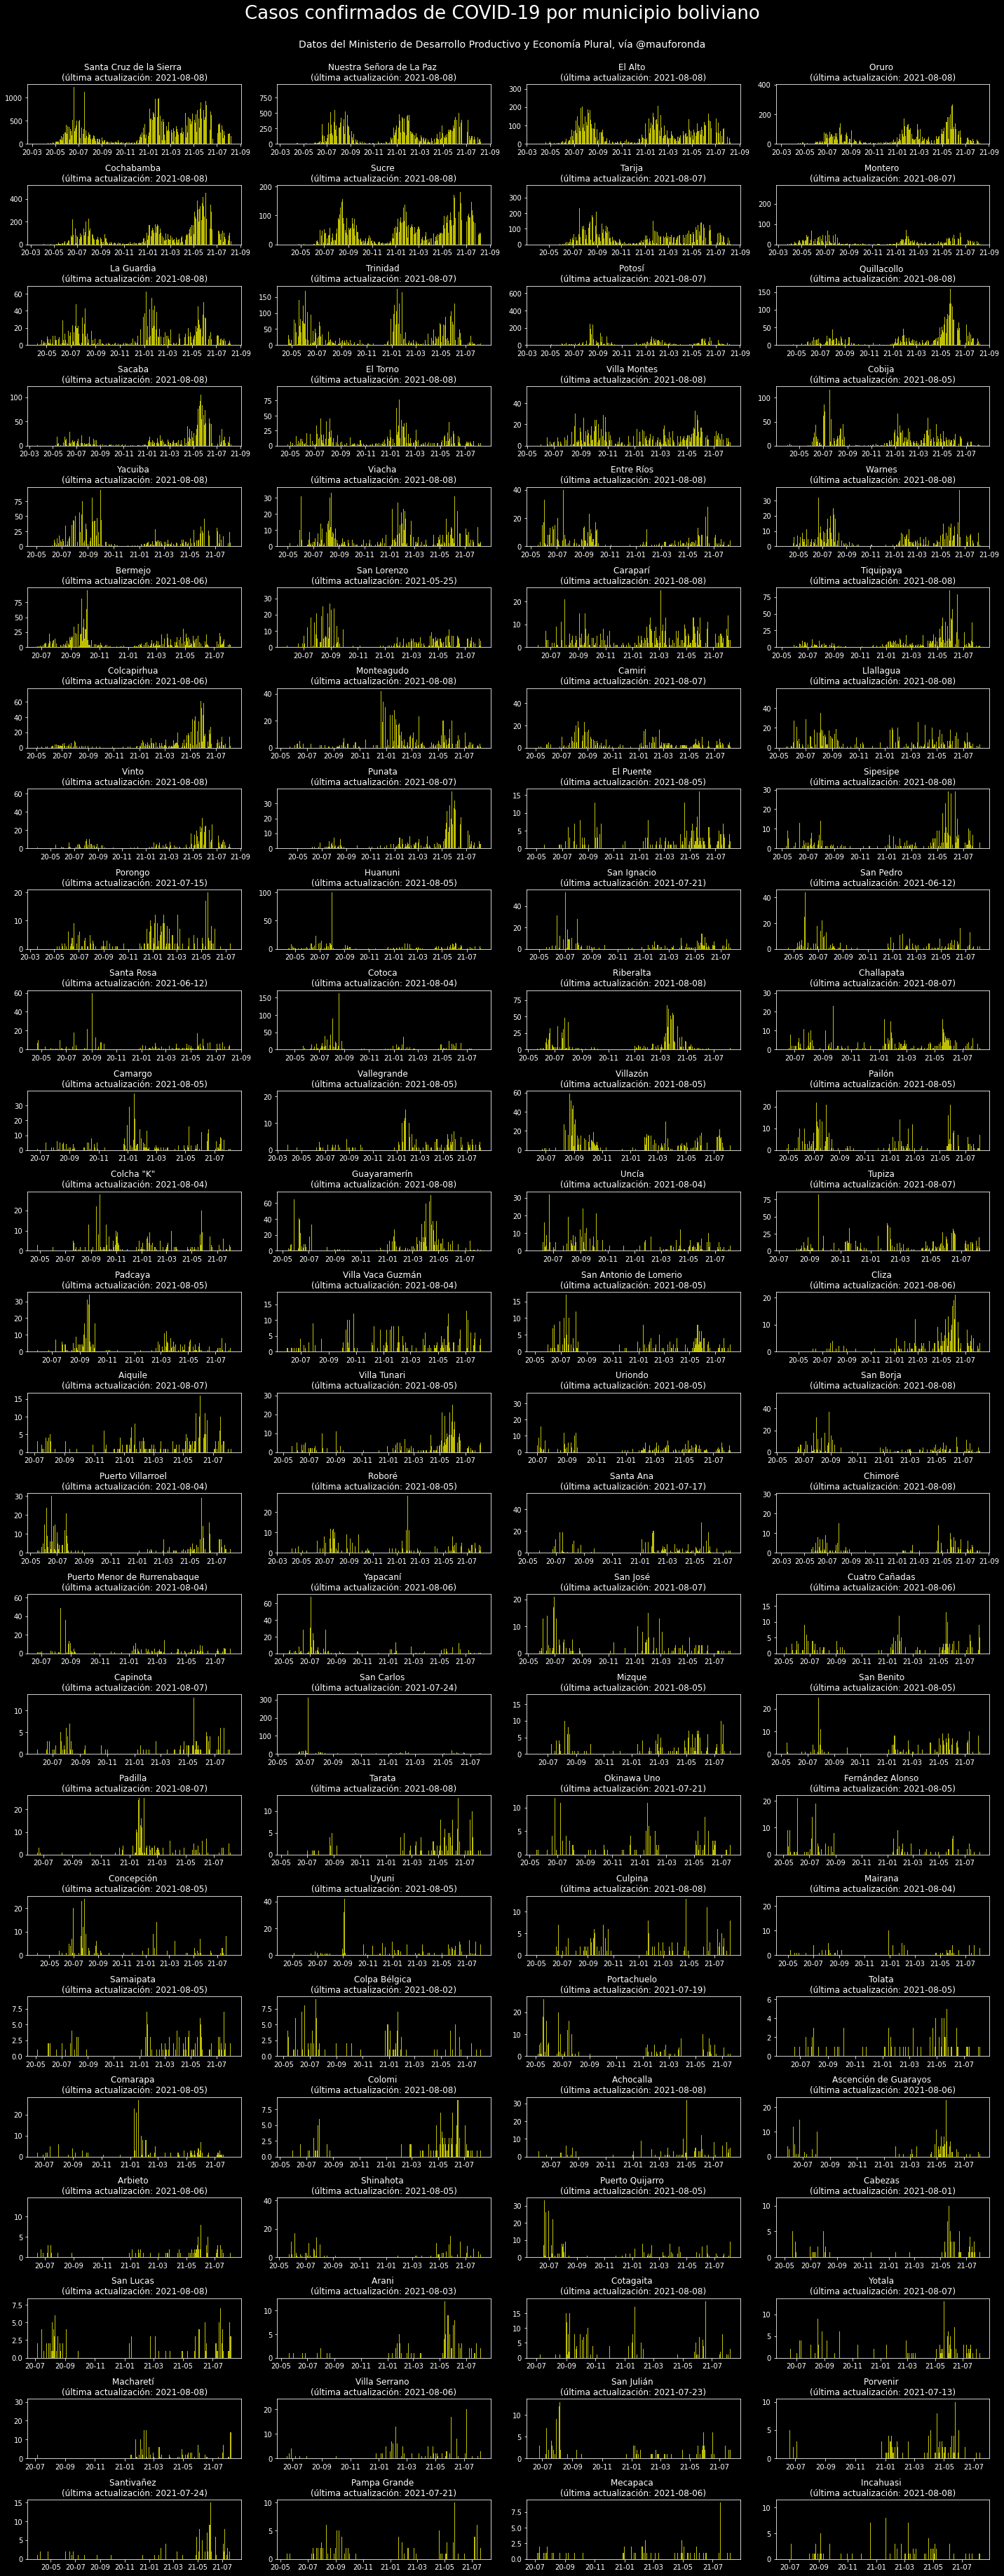

In [79]:
total = 100
nrows = 25
ncols = 4
plt.style.use("dark_background")


fig, axs = plt.subplots(nrows, ncols, figsize = (20,50), sharex=False)
axs = axs.flatten()

fig.suptitle("Casos confirmados de COVID-19 por municipio boliviano", fontsize = 26, y = 1.02)
fig.text(0.5,1.003,"Datos del Ministerio de Desarrollo Productivo y Economía Plural, vía @mauforonda",ha="center", fontsize = 14)

for i in range(100):
  #df_by_mun = pd.read_csv("{}.csv".format(list_municipio_x[i]))
  df_by_mun = df_alt.groupby("municipio_x").get_group("{}".format(list_municipio_x[i]))
  #x= df_by_mun.fecha.array
  df_by_mun.index = pd.to_datetime(df_by_mun.index, format="%Y-%m-%d")
  x= df_by_mun.index
  y= df_by_mun.confirmados
  #df_by_mun.set_index("fecha")

  axs[i].bar(x,y, zorder=2, color="y")
  axs[i].set_title("{} \n(última actualización: {})".format(list_municipio_x[i], 
                   x[-1].date()))

  #axs[i].plot(df_by_mun.confirmados.rolling(7).mean(), zorder=3, color="r")

  axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

fig.tight_layout()

In [80]:
fig.savefig("confirmados_municipal.svg")

In [81]:
fig.savefig("conformados_municipal.jpg")